In [43]:
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as SCI

In [2]:
#Upload the Dataset
Mall = pd.read_csv('Mall_Customers.csv')
Mall.info()
Mall.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
#Check for missing values
Missing = Mall.isnull().sum()
Missing

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

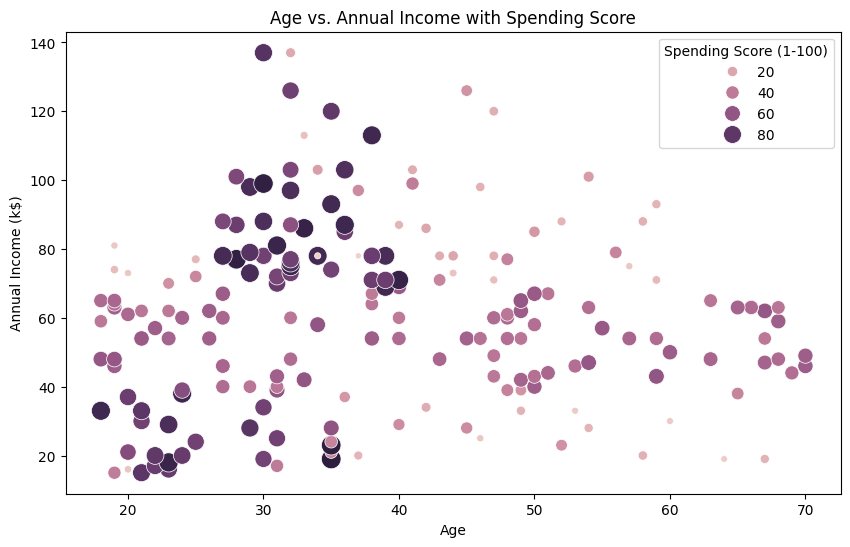

In [26]:
# Scatter plot of Age vs. Annual Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Mall, x='Age', y='Annual Income (k$)', hue='Spending Score (1-100)', size='Spending Score (1-100)', sizes=(20, 200))
plt.title('Age vs. Annual Income with Spending Score')
plt.show()

In [29]:
Mall = pd.get_dummies(Mall, columns=['Gender'], drop_first=True)

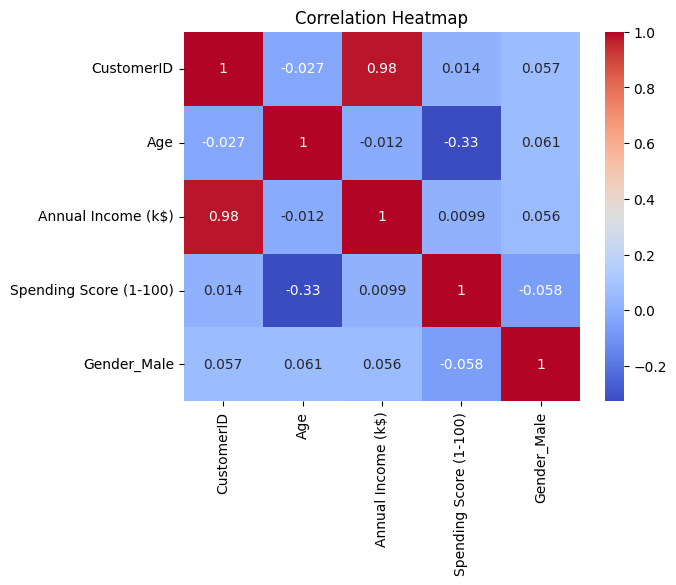

In [30]:
CorMatrix = Mall.corr()
sns.heatmap(CorMatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

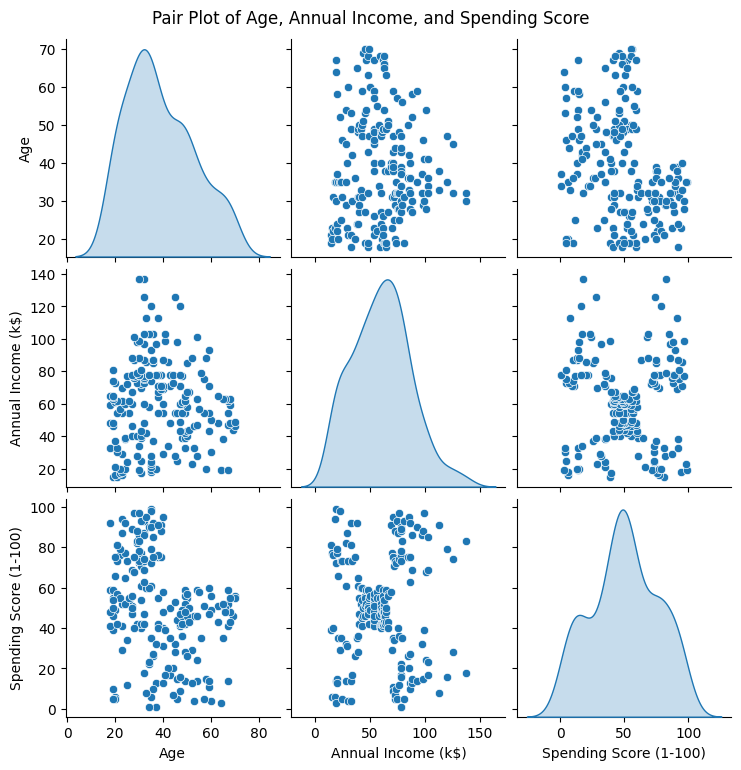

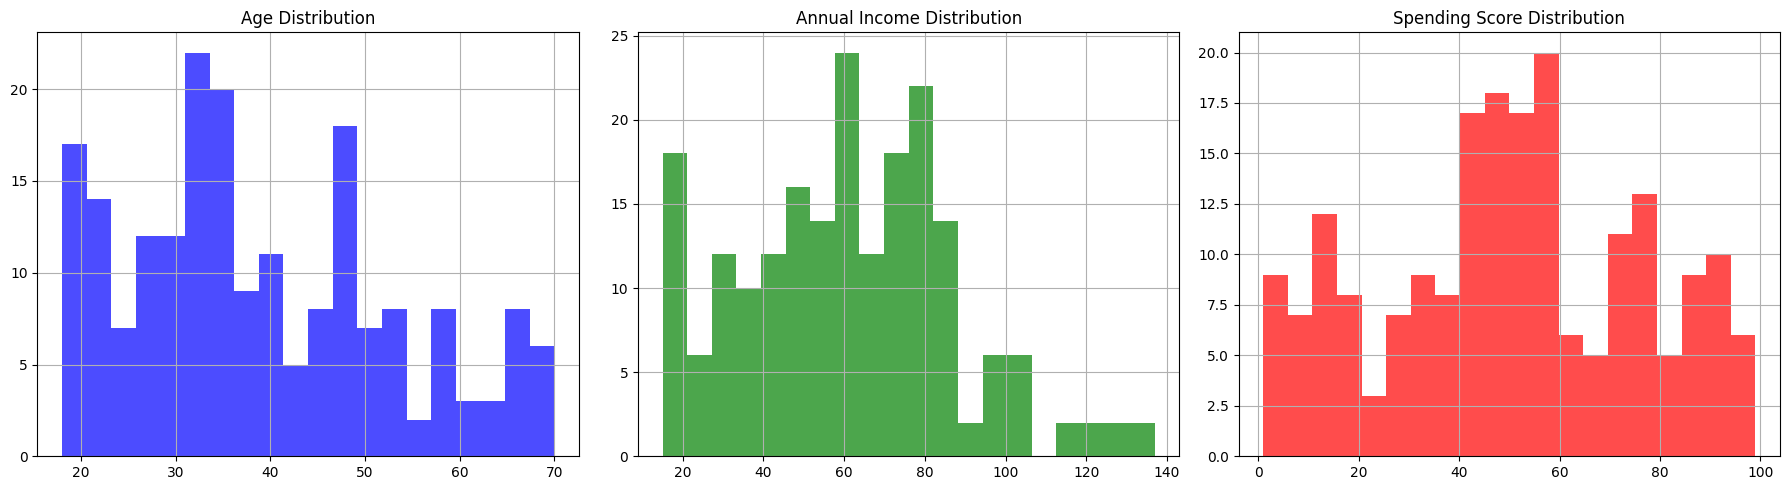

In [4]:
# Perform data normalization (StandardScaler)
Scaler = StandardScaler()
Scaled_data = Scaler.fit_transform(Mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Pair plot and histograms
plt.figure(figsize=(10, 6))
sns.pairplot(Mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind="kde")
plt.suptitle("Pair Plot of Age, Annual Income, and Spending Score", y=1.02)

# Histogram for Age, Annual Income, and Spending Score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
Mall['Age'].hist(bins=20, ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title('Age Distribution')

Mall['Annual Income (k$)'].hist(bins=20, ax=axes[1], color='green', alpha=0.7)
axes[1].set_title('Annual Income Distribution')

Mall['Spending Score (1-100)'].hist(bins=20, ax=axes[2], color='red', alpha=0.7)
axes[2].set_title('Spending Score Distribution')

plt.tight_layout()
plt.show()

In [5]:
X = Mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [6]:
X_Scaled = Scaler.fit_transform(X)

In [37]:
#KMeans
KM_Values = range(1, 11)  
Inertia = []
#Initialize and Fit the K-Means Model
for k in KM_Values:
    KM_Model = KMeans(n_clusters=k, random_state=42)
    KM_Model.fit(X_Scaled)
    Inertia.append(KM_Model.inertia_)
#Predict Clusters
Y_Means = KM_Model.predict(X_Scaled)

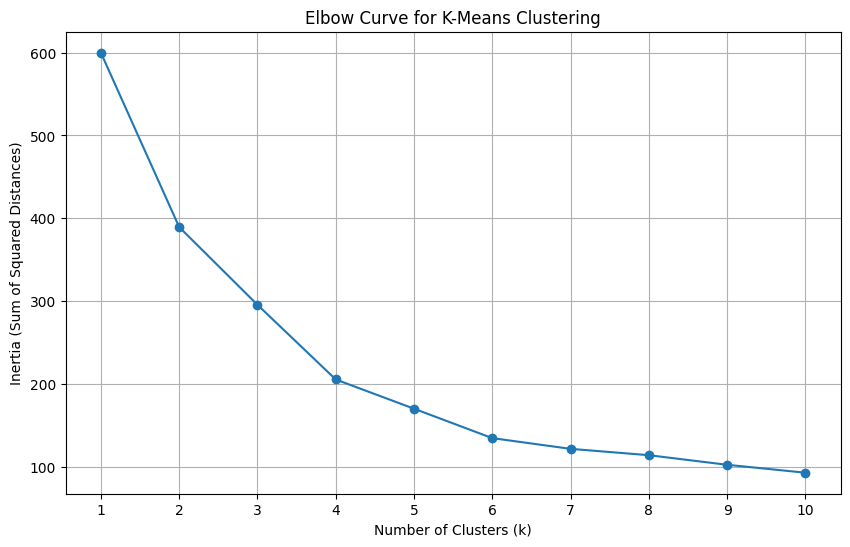

In [39]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(KM_Values, Inertia, marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(KM_Values)
plt.grid()
plt.show()

In [40]:
Optimal_KM = 4  
KM_Model = KMeans(n_clusters=Optimal_KM, random_state=42)
KM_Model.fit(X_Scaled)
Y_Means = KM_Model.predict(X_Scaled)

In [42]:
Mall['Cluster'] = Y_Means

# Calculate mean values for each cluster
Clusters = Mall.groupby('Cluster').mean()
print(Clusters)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         69.415385  53.984615           47.707692               39.969231   
1        161.025000  32.875000           86.100000               81.525000   
2         53.438596  25.438596           40.000000               60.298246   
3        160.552632  39.368421           86.500000               19.578947   

         Gender_Male  
Cluster               
0           0.430769  
1           0.450000  
2           0.403509  
3           0.500000  


The above clusters show how the different clusters are grouped - People around the age of 53 - in cluster 0 have a low income and also splend little
Cluster 1 members earn a lot and also spend a lot - These are in the age of 32 - Managers or good earners with families
Cluster 2 members earn less than everyone byt spend a lot - These are in the age of 25 - Possibly new parents or newly weds or even students that want some luxuries
Cluster 3 members earn a lot but do not spend - These are in the age of 39 - Good earners with less responsibilities or more budget concious

In [41]:
KM_silhouette = silhouette_score(X_Scaled, Y_Means)
print(f"K-Means Silhouette Score: {KM_silhouette}")

K-Means Silhouette Score: 0.4039582785148566


This means that the Data Points are on or near the boundary of the clusters because it is close to 0

In [17]:
print("X shape:", X.shape)
print("Y_Means shape:", Y_Means.shape)
print("Cluster centers shape:", KM_Model.cluster_centers_.shape)

X shape: (200, 3)
Y_Means shape: (200,)
Cluster centers shape: (3, 3)


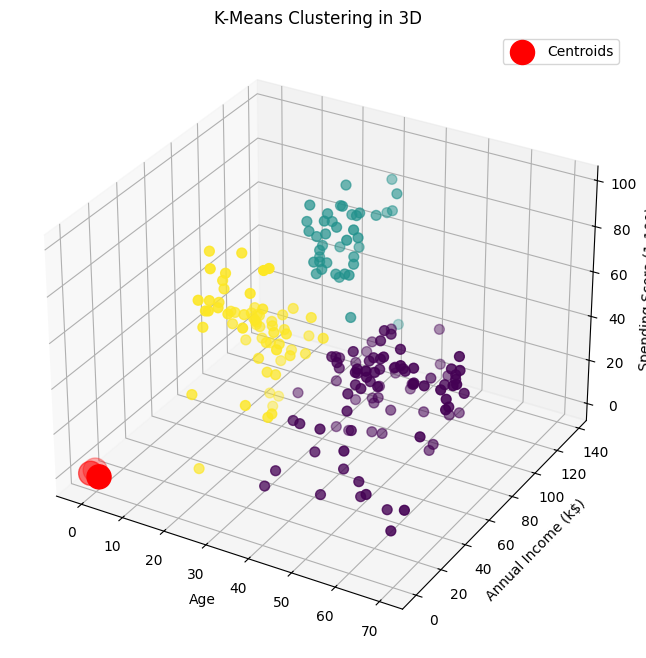

In [18]:
# Create a 3D scatter plot
Fig = plt.figure(figsize=(12, 8))
AX = Fig.add_subplot(111, projection='3d')

# Scatter plot for the clusters
AX.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=Y_Means, cmap='viridis', s=50)

# Scatter plot for the cluster centers
AX.scatter(KM_Model.cluster_centers_[:, 0], KM_Model.cluster_centers_[:, 1], 
           KM_Model.cluster_centers_[:, 2], s=300, c='red', label='Centroids')

# Set labels
AX.set_xlabel('Age')
AX.set_ylabel('Annual Income (k$)')
AX.set_zlabel('Spending Score (1-100)')
AX.set_title('K-Means Clustering in 3D')
AX.legend()

plt.show()

In [45]:
#Agglomerative
Linkage_Methods = ['ward', 'average', 'complete']
Models = {}
#Initialize and Fit the Model
for method in Linkage_Methods:
    AGG_Model = AgglomerativeClustering(n_clusters=4, linkage=method)
    #Predict Clusters
    Y_AGG = AGG_Model.fit_predict(X_Scaled)
    Models[method] = Y_AGG


In [46]:
AGG_silhouette = silhouette_score(X_Scaled, Y_AGG)
print(f"Agglomerative Clustering Silhouette Score: {AGG_silhouette}")

Agglomerative Clustering Silhouette Score: 0.39013868362208315


This means that the Data Points are on or near the boundary of the clusters because it is close to 0

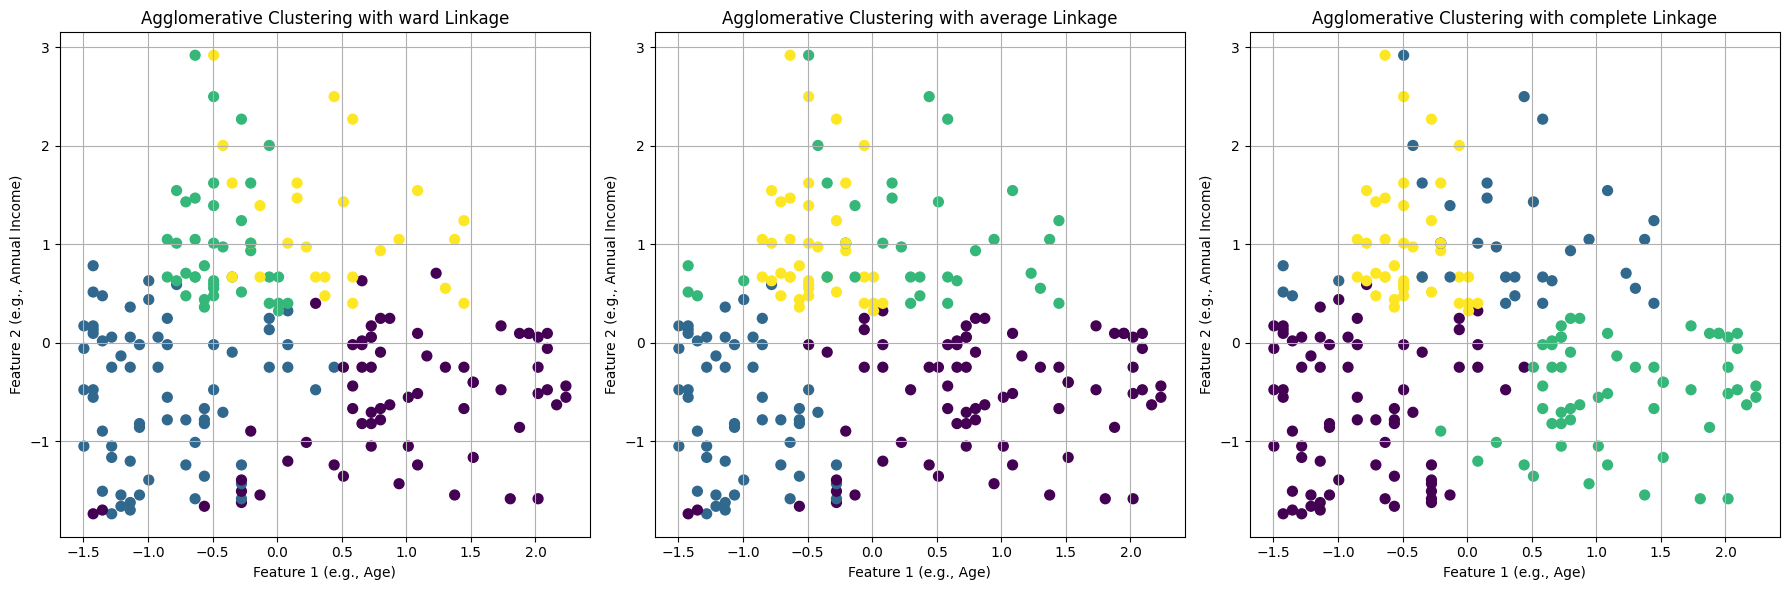

In [48]:
# Plotting the results
plt.figure(figsize=(18, 6))

for i, method in enumerate(Linkage_Methods):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X_Scaled[:, 0], X_Scaled[:, 1], c=Models[method], cmap='viridis', s=50)
    plt.title(f'Agglomerative Clustering with {method} Linkage')
    plt.xlabel('Feature 1 (e.g., Age)')
    plt.ylabel('Feature 2 (e.g., Annual Income)')
    plt.grid()

plt.tight_layout()
plt.show()

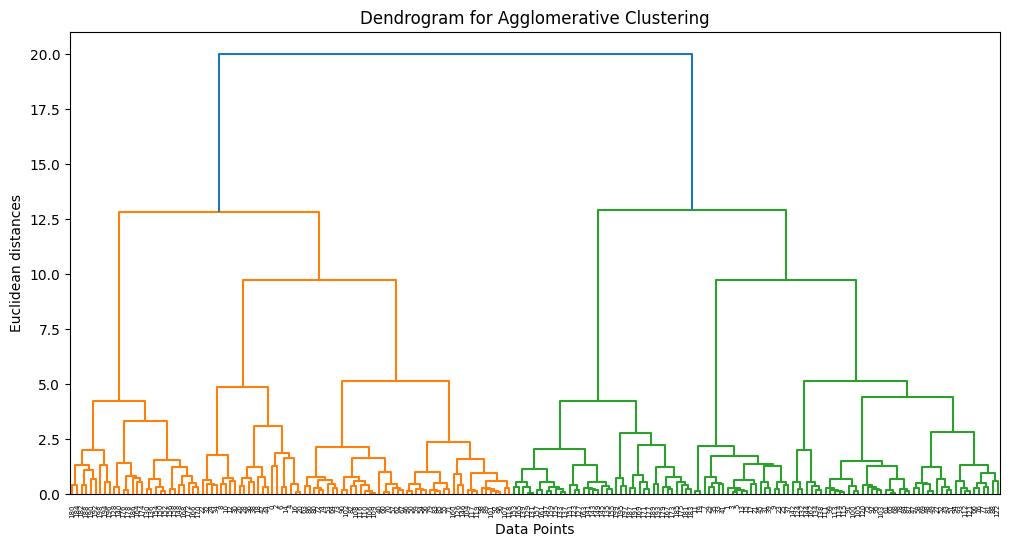

In [49]:
# Create a dendrogram
plt.figure(figsize=(12, 6))
Dendrogram = SCI.dendrogram(SCI.linkage(X_Scaled, method='ward'))  
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()

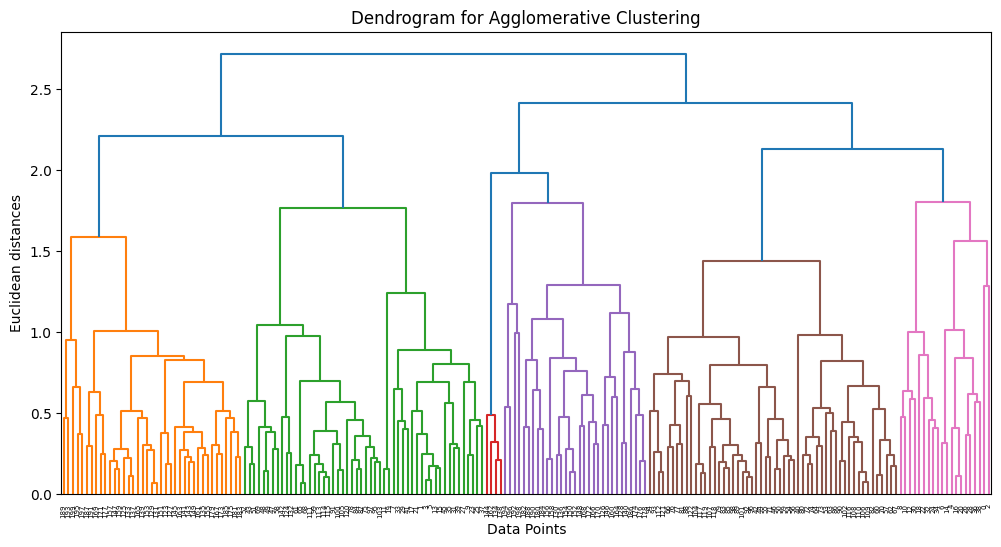

In [50]:
# Create a dendrogram
plt.figure(figsize=(12, 6))
Dendrogram = SCI.dendrogram(SCI.linkage(X_Scaled, method='average'))  
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()

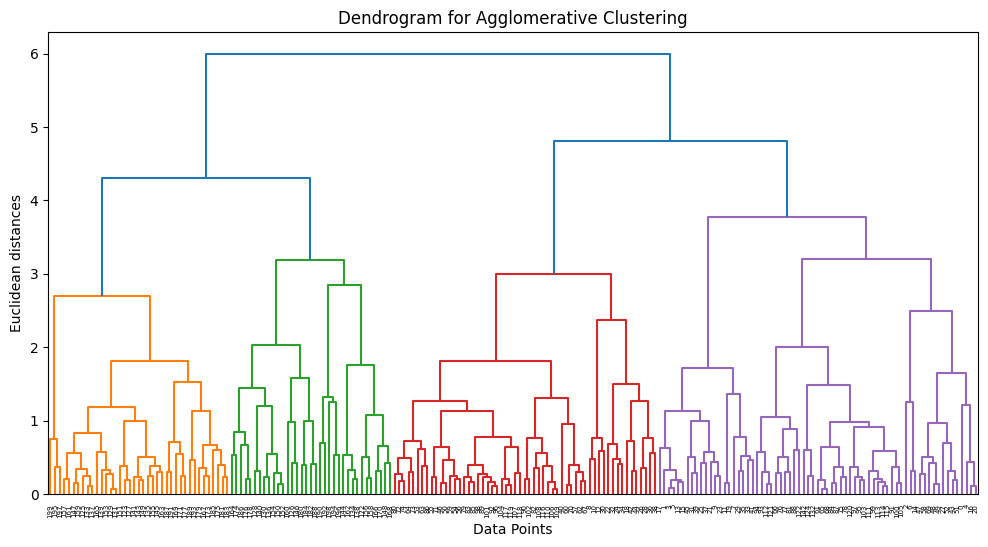

In [51]:
# Create a dendrogram
plt.figure(figsize=(12, 6))
Dendrogram = SCI.dendrogram(SCI.linkage(X_Scaled, method='complete'))  
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()

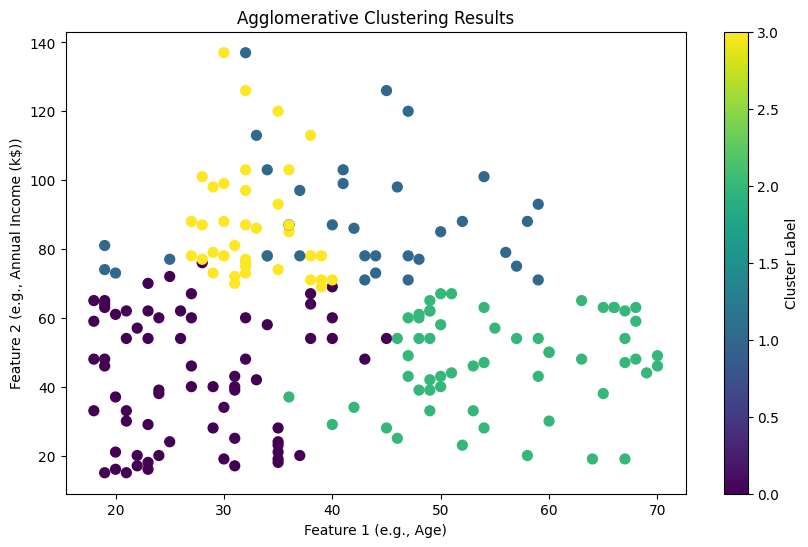

In [47]:
#Plot the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y_AGG, cmap='viridis', s=50)

# Add labels and title
plt.xlabel('Feature 1 (e.g., Age)')
plt.ylabel('Feature 2 (e.g., Annual Income (k$))')
plt.title('Agglomerative Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()

In [20]:
#Principal Component Analysis - Linear

#Initialize PCA and fit to the Data
P_C_A = PCA(n_components=2)
X_PCA = P_C_A.fit_transform(X_Scaled)

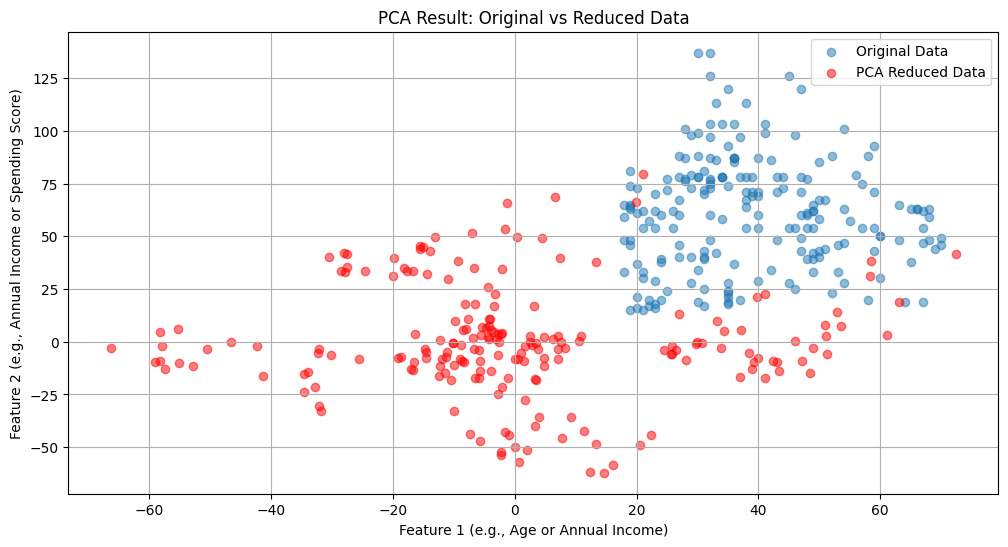

In [22]:
# Plot Results after PCA
plt.figure(figsize=(12, 6))

# Plot original data in the first two dimensions (Age, Annual Income)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.5, label='Original Data')

# Plot the reduced PCA data
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c='red', alpha=0.5, label='PCA Reduced Data')  # Reduced Data

# Add labels and legend
plt.xlabel('Feature 1 (e.g., Age or Annual Income)')
plt.ylabel('Feature 2 (e.g., Annual Income or Spending Score)')
plt.title('PCA Result: Original vs Reduced Data')
plt.legend()
plt.grid()
plt.show()

C:\Users\TAZ78\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


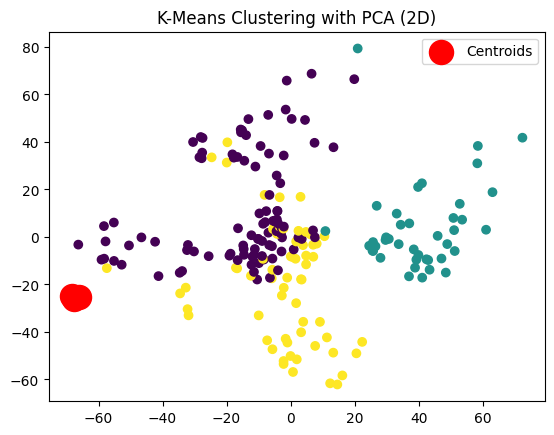

In [35]:
# PCA Plot for K-Means
# Plot the clusters
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=Y_Means, cmap='viridis')

# Plot the cluster centers (after transforming them using PCA)
Centers_PCA = P_C_A.transform(KM_Model.cluster_centers_)
plt.scatter(Centers_PCA[:, 0], Centers_PCA[:, 1], s=300, c='red', label='Centroids')

plt.title('K-Means Clustering with PCA (2D)')
plt.legend()
plt.show()

In [23]:
#T-SNE - Non-Linear

#Initialize T-SNE and fit to the Data
T_SNE = TSNE(n_components=2, random_state=42, perplexity=4)
X_TSNE = T_SNE.fit_transform(X_Scaled)

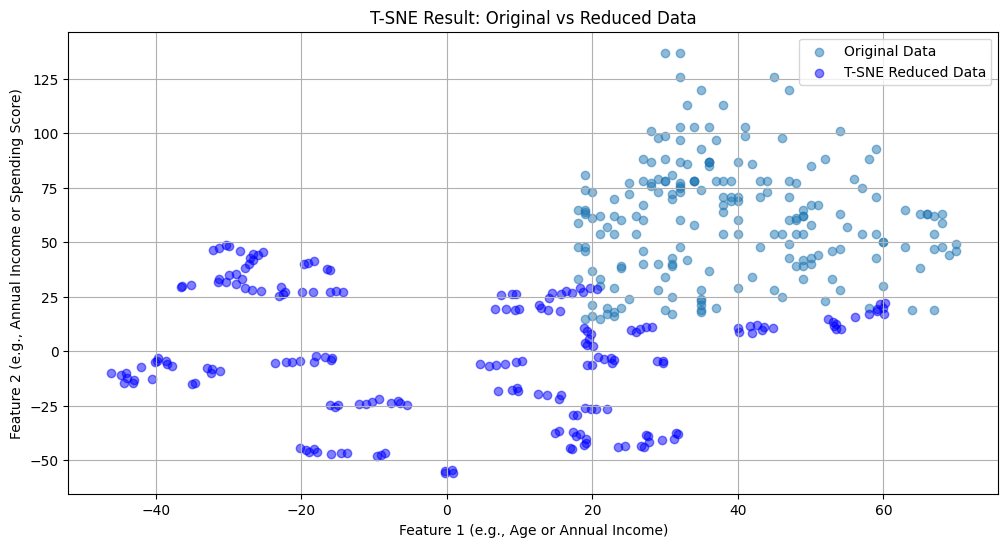

In [25]:
#Plot Results after T-SNE
plt.figure(figsize=(12, 6))

# Scatter plot for original data using first two features
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], alpha=0.5, label='Original Data')

# Scatter plot for T-SNE reduced data
plt.scatter(X_TSNE[:, 0], X_TSNE[:, 1], c='blue', alpha=0.5, label='T-SNE Reduced Data')

# Add labels and legend
plt.xlabel('Feature 1 (e.g., Age or Annual Income)')
plt.ylabel('Feature 2 (e.g., Annual Income or Spending Score)')
plt.title('T-SNE Result: Original vs Reduced Data')
plt.legend()
plt.grid()
plt.show()